# Clean And Analyze Employee Exit Surveys

## Initially exploring the data sets

In [77]:
import numpy as np
import pandas as pd

dete = pd.read_csv("dete_survey.csv")
tafe = pd.read_csv("tafe_survey.csv")

dete.info()
dete.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [78]:
tafe.info()
tafe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Initially exploring the data sets, we can see that each one of them contains data for employment contracts that ended at DETE and TAFE.

We can already identify the columns needed to answer the first question of our stakeholders: "Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction?"

For the DETE data set:

- `ID`: An id used to identify the participant of the survey;
- `SeparationType`: The reason why the person's employment ended;
- `Cease Date`: The year or month the person's employment ended;
- `DETE Start Date`: The year the person began employment with the DETE.

And for the TEFE data set:

- `Record ID`: An id used to identify the participant of the survey;
- `Reason for ceasing employment`: The reason why the person's employment ended;
- `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years).

For now, we'll focus on the data cleaning process that needs to me done, for later easier, faster and more organized data analysis.

## Data Cleaning

### Replacing Missing Data for "NaN" and Dropping Columns

Firstly, we'll read the `Not Stated` values in the DETE data set as `NaN`, to help us on further analysis. Then, we'll drop not needed columns for our analysis on both data sets, simplifying them.

In [79]:
dete = pd.read_csv("dete_survey.csv", na_values="Not Stated")

dete_updated = dete.drop(dete.columns[28:49], axis=1)
tafe_updated = tafe.drop(tafe.columns[17:66], axis=1)

In [80]:
dete_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [81]:
tafe_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [82]:
print(dete_updated.columns)
print(tafe_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

### Standardizing Columns Names

Next, we'll standardize the names of the columns we want to work with, because we eventually want to combine the dataframes. For the DETE data set, we'll change all columns names to lowercase, remove all trailing whitespaces and then replace all spaces with underscore.

For the TAFE data set, we'll update column names to match the names in `dete_updated`.

In [83]:
dete_updated.columns = dete_updated.columns.str.lower().str.strip().str.replace(" ", "_")
dete_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [84]:
mapping = {'Record ID':'id', 'CESSATION YEAR':'cease_date', 'Reason for ceasing employment':'separationtype', 
           'Contributing Factors. Career Move - Public Sector ':'career_move_to_public_sector', 
           'Contributing Factors. Career Move - Private Sector ':'career_move_to_private_sector',
           'Contributing Factors. Interpersonal Conflict':'interpersonal_conflicts',
           'Contributing Factors. Job Dissatisfaction':'job_dissatisfaction',
           'Contributing Factors. Maternity/Family':'maternity/family',
           'Contributing Factors. Ill Health':'ill_health', 'Gender. What is your Gender?':'gender',
           'CurrentAge. Current Age':'age', 'Employment Type. Employment Type':'employment_status',
           'Classification. Classification':'position',
           'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service',
           'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'}
           
        
tafe_updated = tafe_updated.rename(columns=mapping)

tafe_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'career_move_to_public_sector', 'career_move_to_private_sector',
       'Contributing Factors. Career Move - Self-employment', 'ill_health',
       'maternity/family', 'Contributing Factors. Dissatisfaction',
       'job_dissatisfaction', 'interpersonal_conflicts',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

### Filtering the Data

If we look at the unique values in the `separationtype` columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who *resigned*, so their separation type contains the string **'Resignation'**.

In [85]:
dete_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [86]:
tafe_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [87]:
dete_resignations = dete_updated[dete_updated['separationtype'].str.contains('Resignation')].copy()
tafe_resignations = tafe_updated[tafe_updated['separationtype'] == 'Resignation'].copy()

### Verifying the Data


Below, we clean and explore the `cease_date` and `dete_start_date` columns to make sure all of the years make sense. We'll use the following criteria:

- Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date;
- Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

In [88]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
07/2006      1
07/2012      1
2010         1
Name: cease_date, dtype: int64

In [89]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")

dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [90]:
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [91]:
incorrect_rows = (dete_resignations['dete_start_date'] - dete_resignations['cease_date'] > 0).sum()
incorrect_rows

0

There are no `dete_start_date` values below 1940, no years after the current date in `cease_date` and not a single row that contains a `dete_start_date` more recent than its respective `cease_date`.

### Creating a New Column

Now that we've verified the years in the `dete_resignations` dataframe, we'll use them to create a new column. Our end goal is to answer the following question:

- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.

In the `tafe_resignations` dataframe, we already have a column with this information, that we renamed to `institute_service`. In order to analyse the dataframes together, we'll create a corresponding `institute_service` column in the `dete_resignations` dataframe.


In [92]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [93]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


### Identifying Dissatisfied Employees

We need to inspect the columns of both dataframes to come up with the columns that we can categorize as "Dissatisfied".

In [94]:
print(dete_resignations.columns)
print(tafe_resignations.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service'],
      dtype='object')
Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'career_move_to_public_sector', 'career_move_to_private_sector',
       'Contributing Factors. Career Move - Self-employment', 'ill_health',
       'mate

From the `dete_resignations` dataframe, we'll consider the following columns as motive of dissatisfaction: 

- interpersonal_conflicts;
- job_dissatisfaction;
- dissatisfaction_with_the_department;
- physical_work_environment;
- lack_of_recognition;
- lack_of_job_security;
- work_location;
- employment_conditions;
- work_life_balance;
- workload.

From the `tafe_resignations` dataframe, we'll consider the following columns as motive of dissatisfaction:

- Contributing Factors. Dissatisfaction;
- job_dissatisfaction.


If the employee indicated any of the factors above, we'll mark them as *dissatisfied* in a new column.

In [95]:
tafe_resignations['job_dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: job_dissatisfaction, dtype: int64

In [96]:
def update_vals_tafe(x):
    if x == '-':
        return False
    if pd.isnull(x):
        return np.nan
    else:
        return True
    
tafe_resignations['dissatisfied'] = tafe_resignations[['job_dissatisfaction', 'Contributing Factors. Dissatisfaction']].applymap(update_vals_tafe).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

dete_resignations['dissatisfied'] = dete_resignations[['interpersonal_conflicts','job_dissatisfaction',
                                                       'dissatisfaction_with_the_department','physical_work_environment',
                                                       'lack_of_recognition', 'lack_of_job_security', 'work_location',
                                                       'employment_conditions', 'work_life_balance', 'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()

print(tafe_resignations_up['dissatisfied'].value_counts(dropna=False))
print(dete_resignations_up['dissatisfied'].value_counts(dropna=False))

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64
False    157
True     154
Name: dissatisfied, dtype: int64


We now know if an employee left DETE or TAFE dissatisfied or not.

### Combining the Data

To recap, we've accomplished the following:

- Renamed our columns;
- Dropped any data not needed for our analysis;
- Verified the quality of our data;
- Created a new institute_service column;
- Cleaned the Contributing Factors columns;
- Created a new column indicating if an employee resigned because they were dissatisfied in some way.

First, we'll add a now column to each one of the dataframes with the institute information. Then, we're finally ready to combine our datasets. 

In [97]:
tafe_resignations_up['institute'] = 'TAFE'
dete_resignations_up['institute'] = 'DETE'

combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [98]:
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
lack_of_recognition                                    311
employment_conditions                                  311
dissatisfaction_with_the_department                    311
workload                                               311
physical_work_environment                              311
lack_of_job_security                                   3

We'll drop any columns with less than 500 non null values due to not needing them for the analysis.

In [99]:
combined_updated = combined.dropna(thresh = 500, axis = 1).copy()

### Cleaning the Service Column

If we take a look at the `institute_service` column, we can see there are a couple of different forms of data. There are many exact years of service, but also intervals. We need to standardize the data to make our analysis. 

First and foremost, let's remember that our goal is to answer the following: 

- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

That being said, it is primordial to determine what is a short period of time and what is a long. To do that, we are gonna separate our `institute_service` data in 4 different categories:

- New: less than 3 years of service;
- Experienced: 3-6 years of service;
- Established: 7-10 years of service;
- Veteran: more than 10 years of service.

These different categories will be on the brand new `service_cat` column.

In [100]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
25.0                   2
26.0                   2
36.0                   2
28.0                   2
30.0                   2
42.0                   1


There are 7 different intervals on the `institute_service` column:

- Less than 1 year;
- 1-2;
- 3-4;
- 5-6;
- 7-10;
- 11-20;
- More than 20 years.

Because our analysis will be based on the categories we created to label the service time of the employee, it is not important to know exactly how many years he did work. The 7 different intervals can fit in only one different category, as showed below:

- Less than 1 year -> for sure it is New;
- 1-2 -> for sure it is New;
- 3-4 -> for sure it is Experienced;
- 5-6 -> for sure it is Experienced;
- 7-10 -> for sure it is Established;
- 11-20 -> for sure it is Veteran;
- More than 20 years -> for sure it is Veteran.

In [109]:
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

combined_updated['institute_service_up'].value_counts()


1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [116]:
def categorize_ser(x):
    if x>10:
        return 'Veteran'
    elif x>=7:
        return 'Established'
    elif x>=3:
        return 'Experienced'
    elif pd.isnull(x):
        return np.nan
    else:
        return 'New'
    

combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(categorize_ser)

combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

### Performing Initial Analysis

We now have a fully organized and prepared data set to analyze resignation in comparison to dissatisfaction.

In [117]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    398
True     245
NaN        8
Name: dissatisfied, dtype: int64

In [119]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)
combined_updated['dissatisfied'].value_counts(dropna=False)

False    406
True     245
Name: dissatisfied, dtype: int64

In [122]:
dis_cat = pd.pivot_table(combined_updated, index='service_cat', values='dissatisfied')

dis_cat


,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.300518
Veteran,0.507353


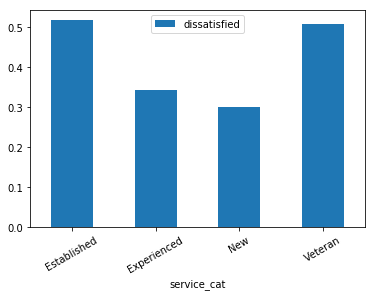

In [123]:
%matplotlib inline
dis_cat.plot(kind='bar', rot=30)

From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. However, we need to handle the rest of the missing data to finalize our analysis.